<a href="https://colab.research.google.com/github/roosvlc/DCWEB-SOBA/blob/main/VisualizationT_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pprint
import pandas as pd
import json
words = []
vectors = []
sentenceIDs = []

file = open('blackwhiteFT.txt', 'r')
total = file.read()
total = total[1:-2]
wordAr = total.split('}, "') 
counter = 0
for ar in wordAr:
    counter+=1
    arr = ar.split('{"word": "')
    arr1 = arr[1].split('", "vector": [')
    arr2 = arr1[1].split(', "sentence id": ')
    
    stringg = arr1[0]
    vecs = arr2[0].split('],[')
    sentenceID = int(arr2[1])+1
    for v in vecs:
        words.append(stringg)
        list1 = list(v.split(','))
        veclist = []
        for item in list1:
            if item[-1] == ']':
                item = item[:-1]
            if item[-2:] == ']]':
                item = item[:-2]
            if item[-3:] == ']]}':
                item = item[:-3]
            veclist.append(float(item))
        vectors.append(veclist)
    sentenceIDs.append(sentenceID)
print("A list of the clustered vectors is made with a list with corresponding labels")
print("Number of words contained in the Json: ", counter)
print("Number of vectors contained in the Json: ", len(vectors))

A list of the clustered vectors is made with a list with corresponding labels
Number of words contained in the Json:  105
Number of vectors contained in the Json:  105


In [ ]:
#Makes lists of vectors necessary for analysis 
listGenPosWords=[
]

listGenNegWords=[
]

listGenPosWordsWrong=[
]
listGenNegWordsWrong=[
]

listType2PosWords = [
]
listType2NegWords = [
]

listType3Words = ['bad','good','great','horrible','beautiful','love','hate','nice','rude','gorgeous','awful','decent','fantastic']


In [4]:
#Code for appending word embeddings corresponding to the words of the list created above
genericpos=[]
genericneg=[]
for index,word in enumerate(words):
    for pos in listGenPosWords:
        if word == pos.lower():
            #genericpos.append(string1)
            genericpos.append([word,vectors[index]])
            break
    for neg in listGenNegWords:
        if word == neg.lower():
            #genericneg.append(string1)
            genericneg.append([word,vectors[index]])
            break
            
type2PosWords = []
type2NegWords = []
for index,word in enumerate(words):
    for pos in listType2PosWords:
        if word == pos.lower():
            #genericpos.append(string1)
            type2PosWords.append([word,vectors[index]])
            break
    for neg in listType2NegWords:
        if word == neg.lower():
            #genericneg.append(string1)
            type2NegWords.append([word,vectors[index]])
            break
type3Words = []
genericpos=[]
genericneg=[]
for index,word in enumerate(words):
    for pos in listType3Words:
        if word == pos.lower():
            #genericpos.append(string1)
            type3Words.append([word,vectors[index],sentenceIDs[index]])
            break

NameError: ignored

In [ ]:
#### import important methods
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:

# FOR GENERIC -> TYPE 1
# Determine the label colours per word
wordsForLab = []
vectors1 = []
for i in genericpos:
    wordsForLab.append(i[0])
    vectors1.append(i[1])
numpos = len(vectors1)
for i in genericneg:
    wordsForLab.append(i[0])
    vectors1.append(i[1])
labels = []
i = 0
while i<len(genericpos):
    labels.append('green')
    i+=1
j = 0
while j<len(genericneg):
    labels.append('red')
    j+=1
print(len(vectors1),numpos,len(vectors1)-numpos)



0 0 0


In [50]:


# FOR ASPECT SPECIFIC -> TYPE 3
# Determine the label colours per word
wordsForLab3 = []
vectors3= []
labels3 = []
for i in type3Words:
  vectors3.append(i[1])
  if (i[2] % 2) == 0:
    name = i[0] + " (-)" # + ',' + str(i[2])
    wordsForLab3.append(name)
    labels3.append('black')
  else :
      name = i[0] +" (+)"# + ',' + str(i[2])
      wordsForLab3.append(name)
      labels3.append('silver')
j = 0
print(labels3)
print(len(wordsForLab3))

['silver', 'black', 'silver', 'black', 'silver', 'black', 'silver', 'black', 'silver', 'black']
10


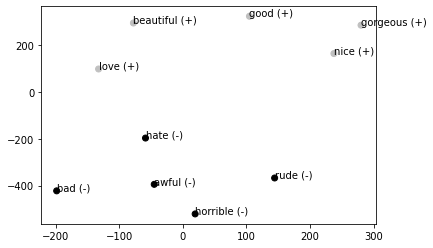

In [51]:
#Make plot by using t-SNE, use good perplexity

tsne = TSNE(n_components=2,perplexity=4,n_iter=100000,random_state=42)
x_5_1 = tsne.fit_transform(vectors3)
#x_6_1 = tsne.fit_transform(vectors1)
plt.scatter(x_5_1[:,0], x_5_1[:,1], color=labels3)
#plt.scatter(x_6_1[:,0], x_6_1[:,1], color=labels)

for i, txt in enumerate(wordsForLab3):
    plt.annotate(txt, (x_5_1[i,0], x_5_1[i,1]))
#for i, txt in enumerate(wordsForLab):
    #plt.annotate(txt, (x_6_1[i,0], x_6_1[i,1]))